In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
df = pd.read_csv("activeff_v190_r000_reload001_filament.flock", header=3, low_memory=False, delim_whitespace=True)

In [4]:
filcols = [col for col in df.columns if col[:3] == 'fil']

In [5]:
flockstates = df[filcols]
flocksteady = flockstates[len(flockstates)//2:]
first = flockstates.iloc[:, 0]

In [6]:
def dwellTime(data, times, state=0):
    index = np.asarray(data[data==state].index)
    times.append(np.array([len(i) for i in np.split(index, np.where(np.diff(index) != 1)[0]+1) if len(i) > 0]))
def getStatsText(x):
    return "Mean: {:6.2f}\nMedian: {:6.2f}\nStd: {:6.2f}".format(
                np.mean(x), np.median(x), np.std(x))



In [ ]:
noFlockDwellT = []
extFlockDwellT = []
intFlockDwellT = []
_ = flockstates.apply(lambda x: dwellTime(x, noFlockDwellT, 0))
_ = flockstates.apply(lambda x: dwellTime(x, extFlockDwellT, 1))
_ = flockstates.apply(lambda x: dwellTime(x, intFlockDwellT, 2))
noFlockDwellT = np.concatenate(noFlockDwellT)
extFlockDwellT = np.concatenate(extFlockDwellT)
intFlockDwellT = np.concatenate(intFlockDwellT)

In [7]:
noFlockDwellT = []
extFlockDwellT = []
intFlockDwellT = []
_ = flocksteady.apply(lambda x: dwellTime(x, noFlockDwellT, 0))
_ = flocksteady.apply(lambda x: dwellTime(x, extFlockDwellT, 1))
_ = flocksteady.apply(lambda x: dwellTime(x, intFlockDwellT, 2))
noFlockDwellT = np.concatenate(noFlockDwellT)
extFlockDwellT = np.concatenate(extFlockDwellT)
intFlockDwellT = np.concatenate(intFlockDwellT)

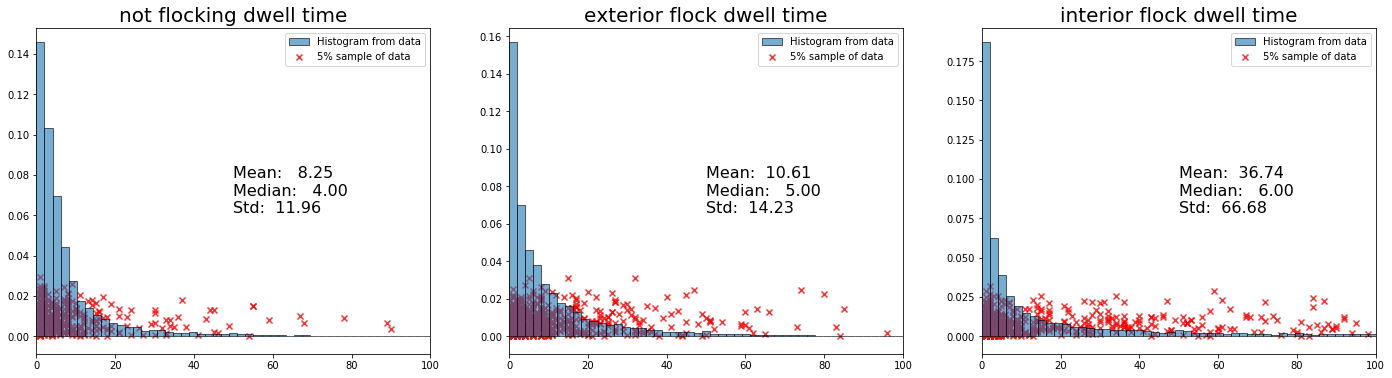

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
for ax, dt, name in zip(axes, [noFlockDwellT, extFlockDwellT, intFlockDwellT], ['not flocking', 'exterior flock', 'interior flock']):
    #kde = sm.nonparametric.KDEUnivariate(dt)
    #kde.fit()
    #ax.hist(noFlockDwellT, bins=np.linspace(0, 100, 50), label=name)
    # Plot the histrogram
    ax.hist(dt, bins=np.linspace(0, 100, 50), density=True, label='Histogram from data',
            zorder=5, edgecolor='k', alpha=0.6)

    # Plot the KDE as fitted using the default arguments
    #ax.plot(kde.support, kde.density, lw=3, label='KDE from data', zorder=10)

    # Plot the samples
    ax.scatter(dt[::20], np.abs(np.random.randn(dt[::20].size))/100,
               marker='x', color='red', zorder=1, label='5% sample of data', alpha=0.8)
    ax.legend(loc='best')
    ax.set_xlim(0, 100)
    ax.set_title(name + " dwell time", fontsize=20)
    ax.text(0.5, 0.5, getStatsText(dt), fontsize=16, ha='left', va='center', transform=ax.transAxes)
plt.show()

In [22]:
def getFreqArrays(data):
    diffs = np.diff(data)
    return np.array([len(diffs[diffs==x]) for x in [-3, -2, -1, 1, 2, 3]])



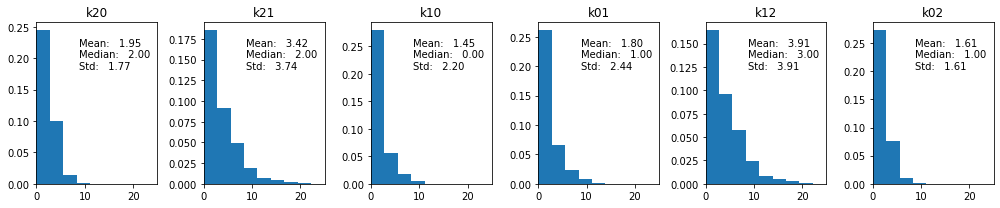

In [23]:
tmpdata = flocksteady.copy()
tmpdata[tmpdata==2] = 3
tmpdata = tmpdata.apply(getFreqArrays).transpose()
tmpdata.columns = ['k20', 'k21', 'k10', 'k01', 'k12', 'k02']
fig, axes = plt.subplots(1, 6, figsize=(14,3))
for ax, colname in zip(axes, tmpdata.columns):
    ax.hist(tmpdata[colname], bins=np.linspace(0, 25, 10), label=colname, density=True)
    ax.set_xlim(0, 25)
    #ax.legend(loc='best')
    ax.set_title(colname)
    ax.text(0.35, 0.8, getStatsText(tmpdata[colname]), ha='left', va='center', transform=ax.transAxes)
fig.tight_layout()
plt.show()

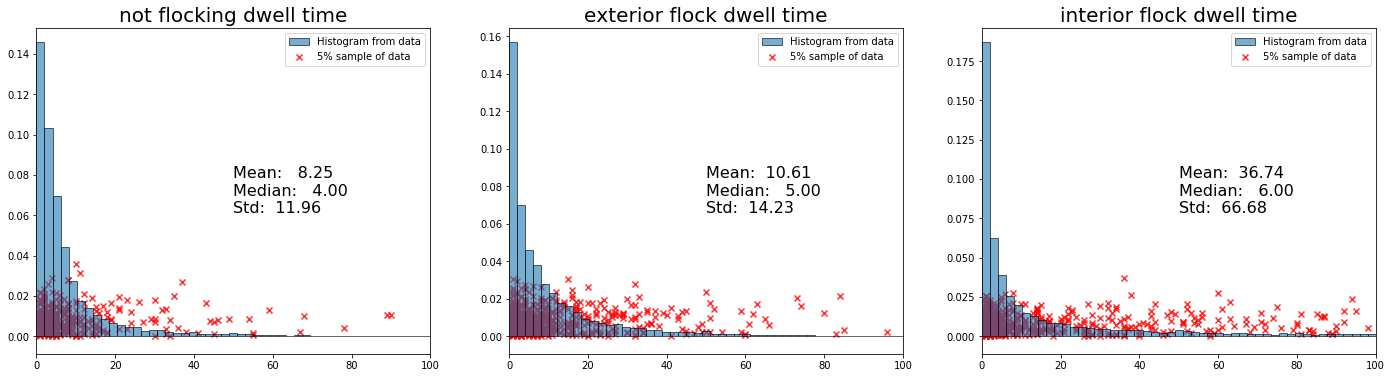

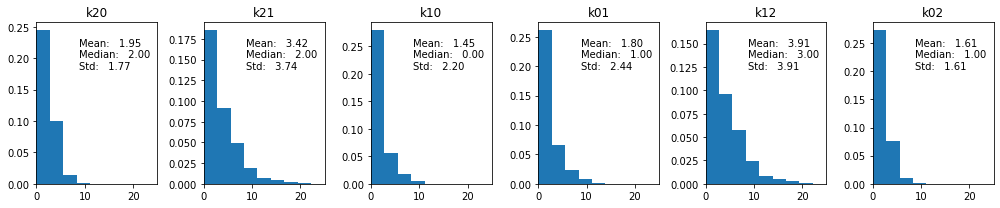

In [34]:
df = pd.read_csv("activeff_v190_r000_reload001_filament.flock", header=3, low_memory=False, delim_whitespace=True)
header = pd.read_csv("activeff_v190_r000_reload001_filament.flock", header=1, nrows=1, delim_whitespace=True)
filcols = [col for col in df.columns if col[:3] == 'fil']
flockstates = df[filcols]
flockstates = flockstates[len(flockstates)//2:]
def dwellTime(data, times, state=0):
    index = np.asarray(data[data==state].index)
    times.append(np.array([len(i) for i in np.split(index, np.where(np.diff(index) != 1)[0]+1) if len(i) > 0]))
def getStatsText(x):
    return "Mean: {:6.2f}\nMedian: {:6.2f}\nStd: {:6.2f}".format(
                np.mean(x), np.median(x), np.std(x))

noFlockDwellT = []
extFlockDwellT = []
intFlockDwellT = []
_ = flockstates.apply(lambda x: dwellTime(x, noFlockDwellT, 0))
_ = flockstates.apply(lambda x: dwellTime(x, extFlockDwellT, 1))
_ = flockstates.apply(lambda x: dwellTime(x, intFlockDwellT, 2))
noFlockDwellT = np.concatenate(noFlockDwellT)
extFlockDwellT = np.concatenate(extFlockDwellT)
intFlockDwellT = np.concatenate(intFlockDwellT)
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
for ax, dt, name in zip(axes, [noFlockDwellT, extFlockDwellT, intFlockDwellT], ['not flocking', 'exterior flock', 'interior flock']):
    # Plot the histrogram
    ax.hist(dt, bins=np.linspace(0, 100, 50), density=True, label='Histogram from data',
            zorder=5, edgecolor='k', alpha=0.6)

    # Plot the samples
    ax.scatter(dt[::20], np.abs(np.random.randn(dt[::20].size))/100,
               marker='x', color='red', zorder=1, label='5% sample of data', alpha=0.8)
    ax.legend(loc='best')
    ax.set_xlim(0, 100)
    ax.set_title(name + " dwell time", fontsize=20)
    ax.text(0.5, 0.5, getStatsText(dt), fontsize=16, ha='left', va='center', transform=ax.transAxes)
plt.show()
def getFreqArrays(data):
    diffs = np.diff(data)
    return np.array([len(diffs[diffs==x]) for x in [-3, -2, -1, 1, 2, 3]])

tmpdata = flocksteady.copy()
tmpdata[tmpdata==2] = 3
tmpdata = tmpdata.apply(getFreqArrays).transpose()
tmpdata.columns = ['k20', 'k21', 'k10', 'k01', 'k12', 'k02']
fig, axes = plt.subplots(1, 6, figsize=(14,3))
for ax, colname in zip(axes, tmpdata.columns):
    ax.hist(tmpdata[colname], bins=np.linspace(0, 25, 10), label=colname, density=True)
    ax.set_xlim(0, 25)
    ax.set_title(colname)
    ax.text(0.35, 0.8, getStatsText(tmpdata[colname]), ha='left', va='center', transform=ax.transAxes)
#fig.suptitle(str(header['persistence_length'].iloc[0]))
fig.tight_layout()
plt.show()

In [39]:
flocksteady.shape[0]

313

In [36]:
df2 = pd.read_csv("activeff_v190_r000_reload001_filament.flock", header=1, nrows=1, delim_whitespace=True)

In [37]:
df2

,length,diameter,bond_length,persistence_length,umax,driving,nsteps,nspec,delta
0,60,1,5.45455,30000,200,30,10000000,1000,0.0001


In [40]:
header.persistence_length.iloc[0]

30000

In [43]:
def PlotFlockState(fname):
    df = pd.read_csv(fname, header=3, low_memory=False, delim_whitespace=True)
    header = pd.read_csv(fname, header=1, nrows=1, delim_whitespace=True)
    filcols = [col for col in df.columns if col[:3] == 'fil']
    flockstates = df[filcols]
    duration = flockstates.shape[0]
    #flockstates = flockstates[len(flockstates)//2:]
    #flockstates = flockstates[len(flockstates)//2:]
    def dwellTime(data, times, state=0):
        index = np.asarray(data[data==state].index)
        times.append(np.array([len(i) for i in np.split(index, np.where(np.diff(index) != 1)[0]+1) if len(i) > 0]))
    def getStatsText(x):
        return "Mean: {:6.4f}\nMedian: {:6.4f}\nStd: {:6.4f}".format(
                    np.mean(x), np.median(x), np.std(x))

    noFlockDwellT = []
    extFlockDwellT = []
    intFlockDwellT = []
    _ = flockstates.apply(lambda x: dwellTime(x, noFlockDwellT, 0))
    _ = flockstates.apply(lambda x: dwellTime(x, extFlockDwellT, 1))
    _ = flockstates.apply(lambda x: dwellTime(x, intFlockDwellT, 2))
    noFlockDwellT = np.concatenate(noFlockDwellT)
    extFlockDwellT = np.concatenate(extFlockDwellT)
    intFlockDwellT = np.concatenate(intFlockDwellT)
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    for ax, dt, name in zip(axes, [noFlockDwellT, extFlockDwellT, intFlockDwellT], ['not flocking', 'exterior flock', 'interior flock']):
        # Plot the histrogram
        ax.hist(dt, bins=np.linspace(0, 100, 50), density=True, label='Histogram from data',
                zorder=5, edgecolor='k', alpha=0.6)

        # Plot the samples
        ax.scatter(dt[::20], np.abs(np.random.randn(dt[::20].size))/100,
                   marker='x', color='red', zorder=1, label='5% sample of data', alpha=0.8)
        ax.legend(loc='best')
        ax.set_xlim(0, 100)
        ax.set_title(name + " dwell time", fontsize=20)
        ax.text(0.5, 0.5, getStatsText(dt), fontsize=16, ha='left', va='center', transform=ax.transAxes)
    plt.show()
    fig.savefig(str(header['persistence_length'].iloc[0])+'_flock_reload2.png')
    def getFreqArrays(data):
        diffs = np.diff(data)
        return np.array([len(diffs[diffs==x])/duration for x in [-3, -2, -1, 1, 2, 3]])

    tmpdata = flockstates.copy()
    tmpdata[tmpdata==2] = 3
    tmpdata.shape[0]
    tmpdata = tmpdata.apply(getFreqArrays).transpose()
    tmpdata.columns = ['k20', 'k21', 'k10', 'k01', 'k12', 'k02']
    fig, axes = plt.subplots(1, 6, figsize=(14,3))
    for ax, colname in zip(axes, tmpdata.columns):
        ax.hist(tmpdata[colname], label=colname, density=True)
        #ax.set_xlim(0, 25)
        ax.set_title(colname)
        ax.text(0.35, 0.8, getStatsText(tmpdata[colname]), ha='left', va='center', transform=ax.transAxes)
        np.mean(tmpdata[colname]), np.std(tmpdata[colname])
    #fig.suptitle(str(header['persistence_length']))
    fig.tight_layout()
    plt.show()
    fig.savefig(str(header['persistence_length'].iloc[0])+'_flock_freqs_reload2.png')


In [50]:
D = {'lp': [], 'k20': [], 'k21': [], 'k10': [], 'k01': [], 'k12': [], 'k02': []}
def dosomething(fname):
    df = pd.read_csv(fname, header=3, low_memory=False, delim_whitespace=True)
    header = pd.read_csv(fname, header=1, nrows=1, delim_whitespace=True)

    D['lp'].append(header.persistence_length.iloc[0]/60)
    filcols = [col for col in df.columns if col[:3] == 'fil']
    flockstates = df[filcols]
    duration = flockstates.shape[0]
    def getFreqArrays(data):
        diffs = np.diff(data)
        return np.array([len(diffs[diffs==x])/duration for x in [-3, -2, -1, 1, 2, 3]])

    #flockstates = flockstates[len(flockstates)//2:]
    #flockstates = flockstates[len(flockstates)//2:]
    tmpdata = flockstates.copy()
    tmpdata[tmpdata==2] = 3
    tmpdata = tmpdata.apply(getFreqArrays).transpose()
    tmpdata.columns = ['k20', 'k21', 'k10', 'k01', 'k12', 'k02']
    for colname in tmpdata.columns:
        D[colname].append(np.mean(tmpdata[colname]))
for i in range(64, 80):
    dosomething('activeff_v0' + str(i) +'_r000_reload002_filament.flock')

In [52]:
LP = D['lp']


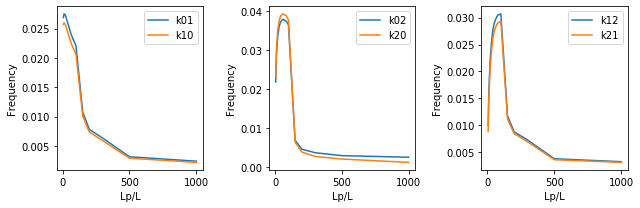

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].plot(LP, D['k01'], label='k01')
axes[0].plot(LP, D['k10'], label='k10')
axes[1].plot(LP, D['k02'], label='k02')
axes[1].plot(LP, D['k20'], label='k20')
axes[2].plot(LP, D['k12'], label='k12')
axes[2].plot(LP, D['k21'], label='k21')
for ax in axes:
    ax.set_xlabel('Lp/L')
    ax.set_ylabel('Frequency')
    ax.legend(loc='best')
fig.tight_layout()

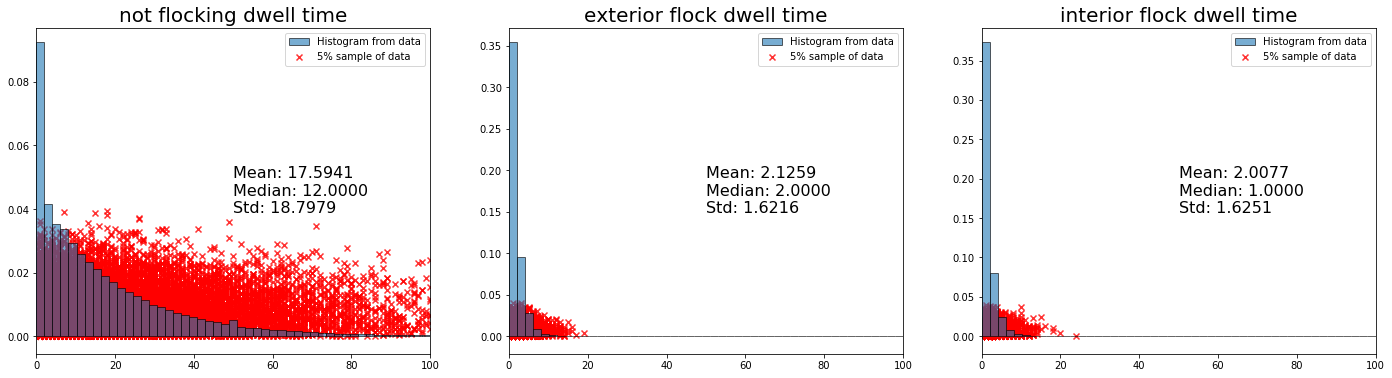

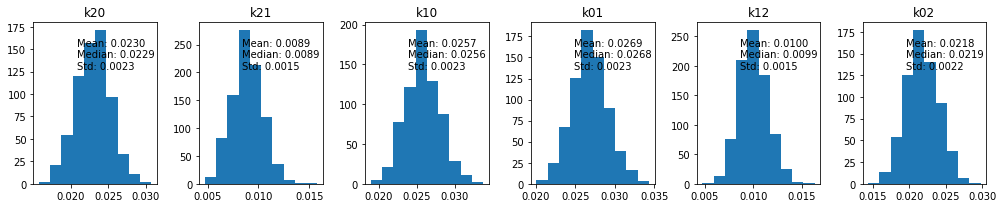

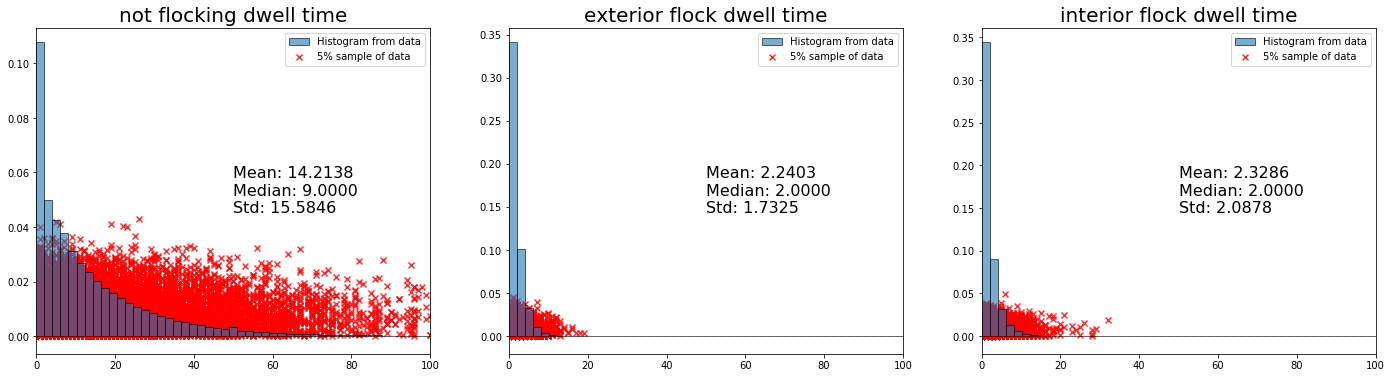

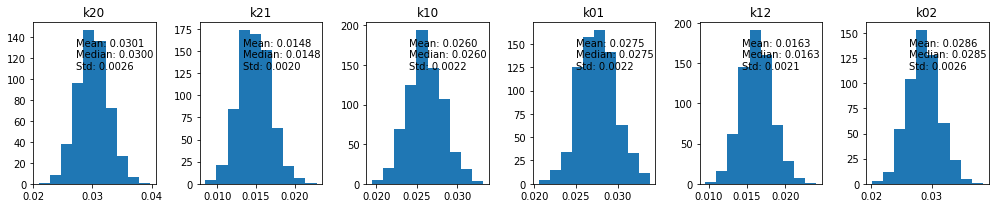

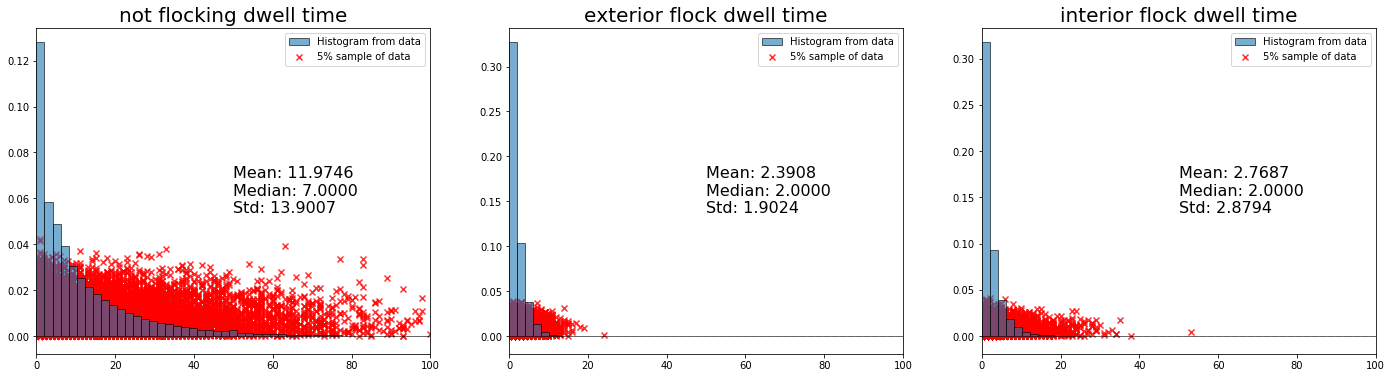

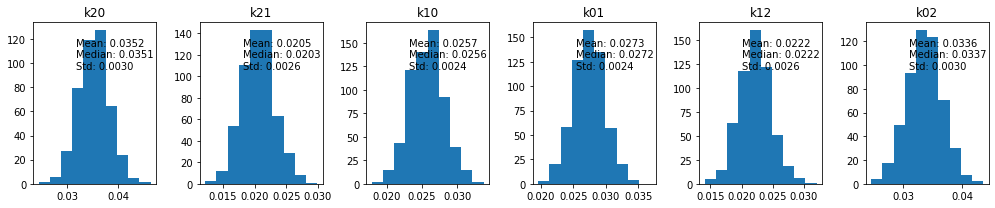

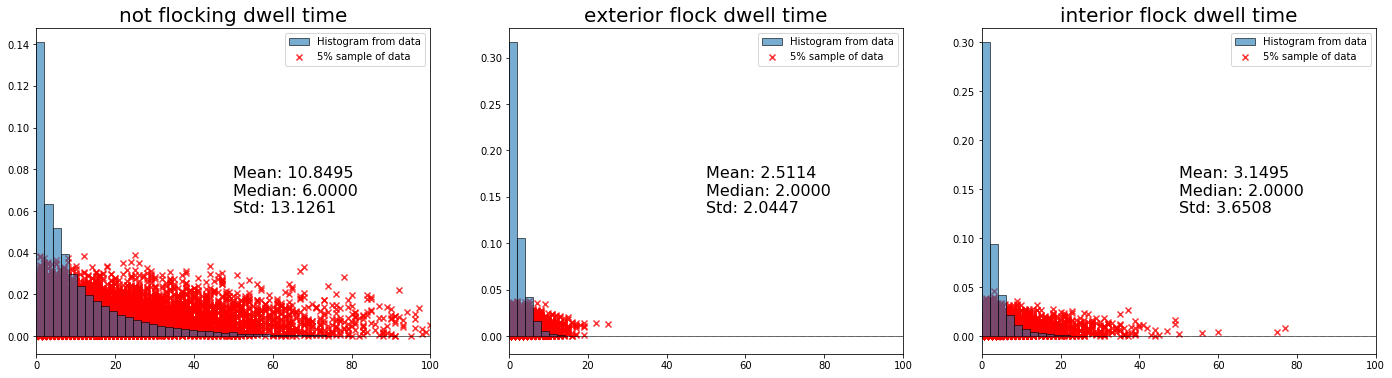

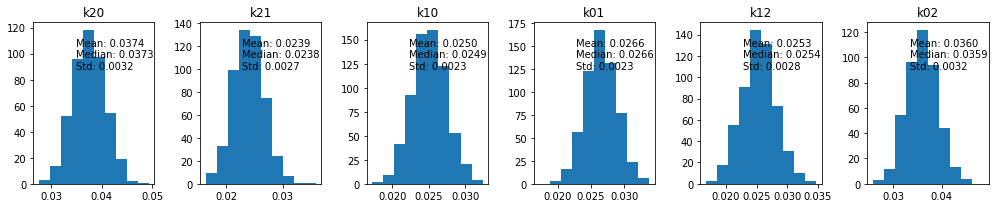

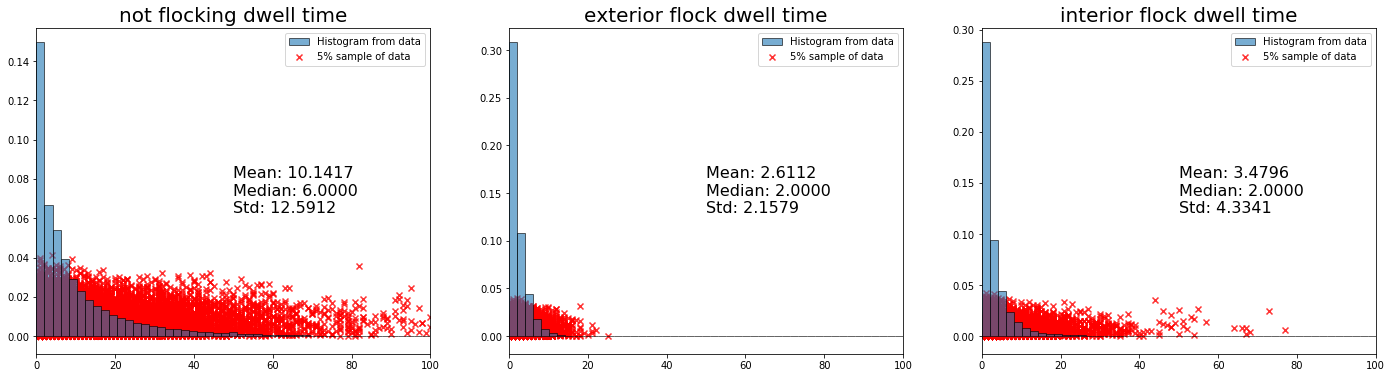

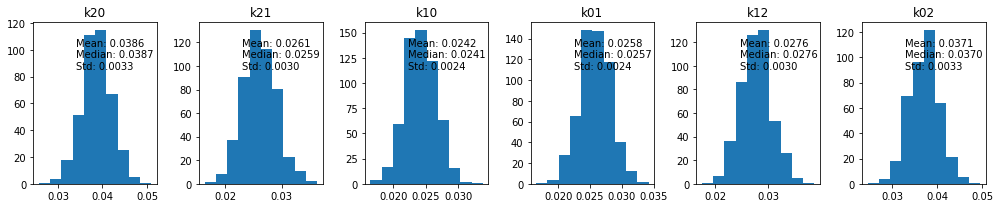

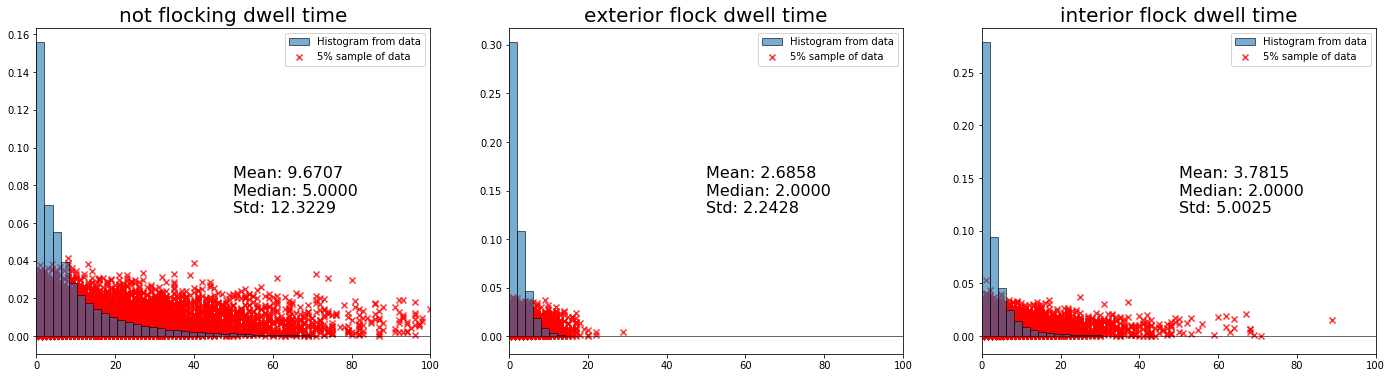

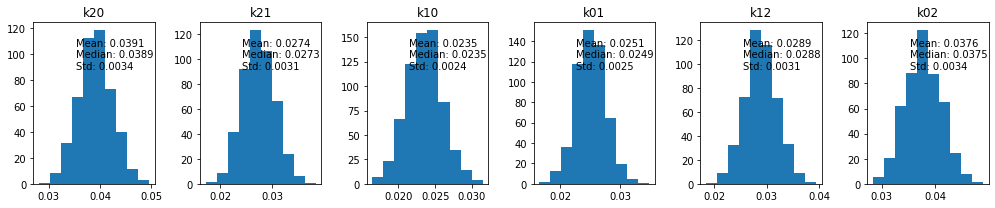

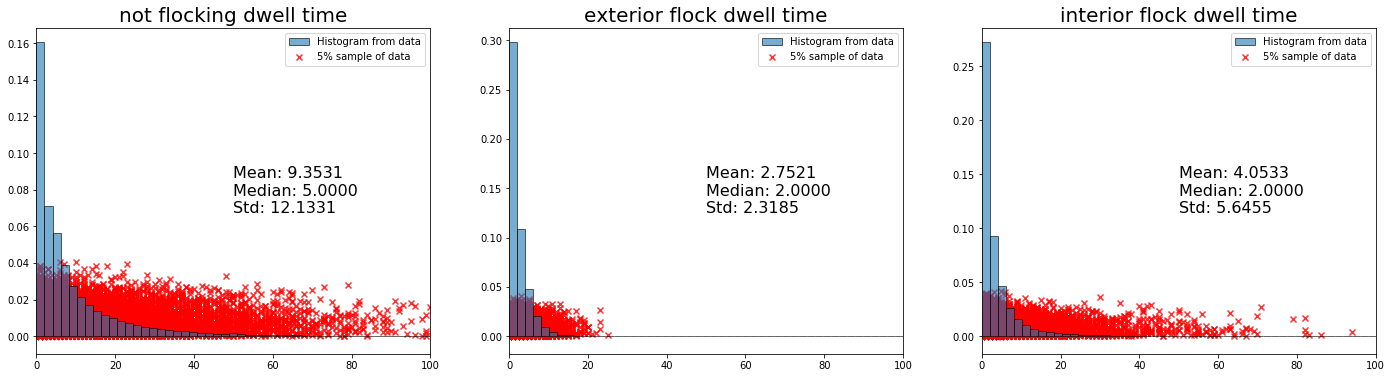

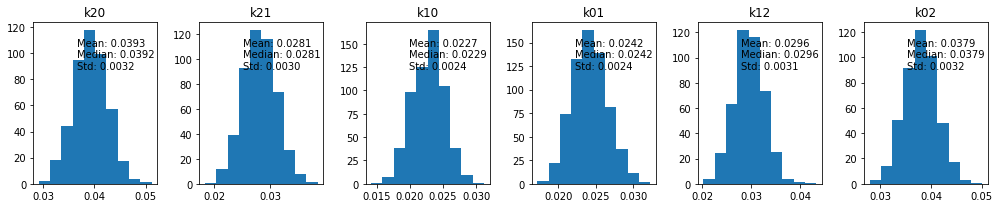

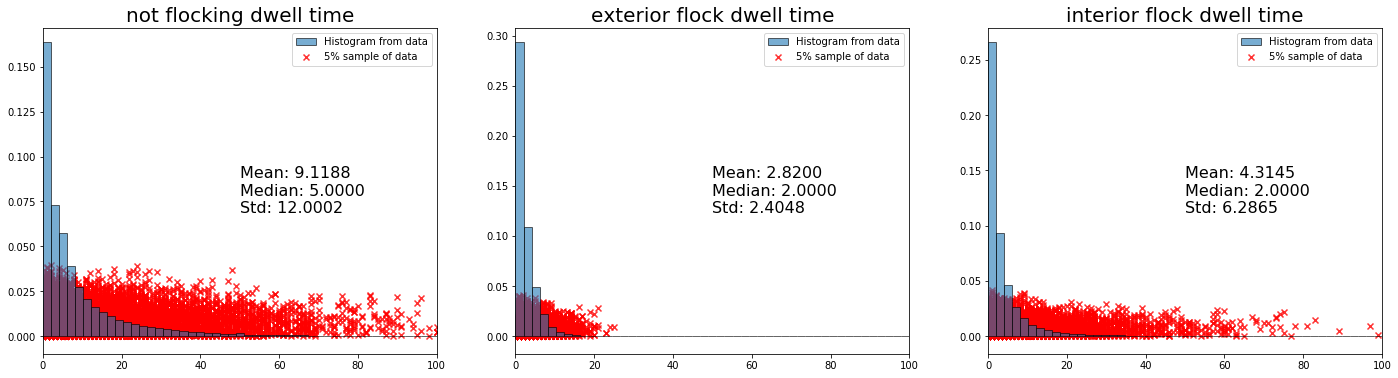

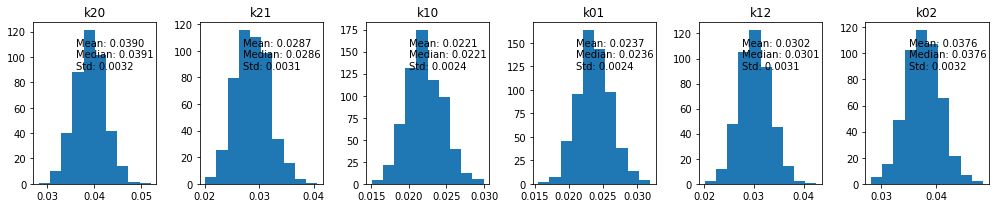

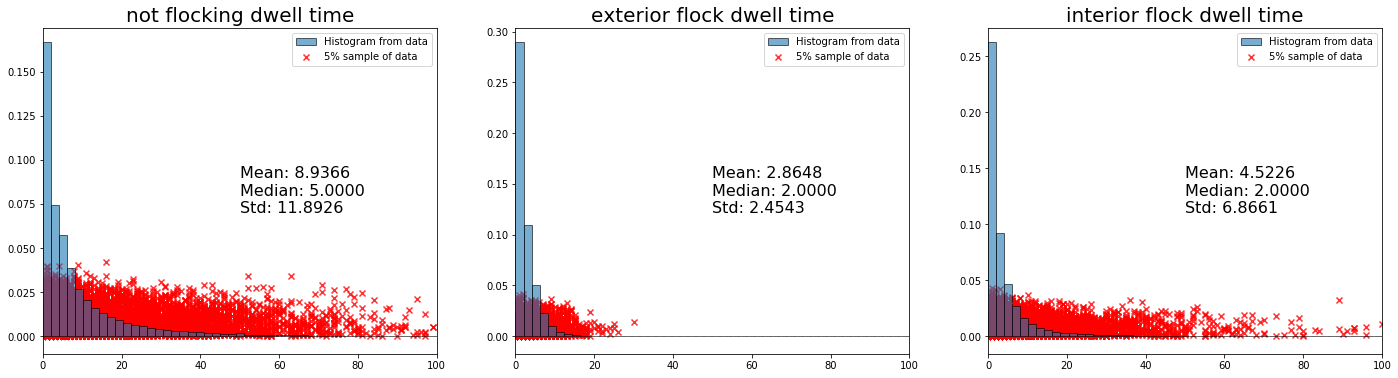

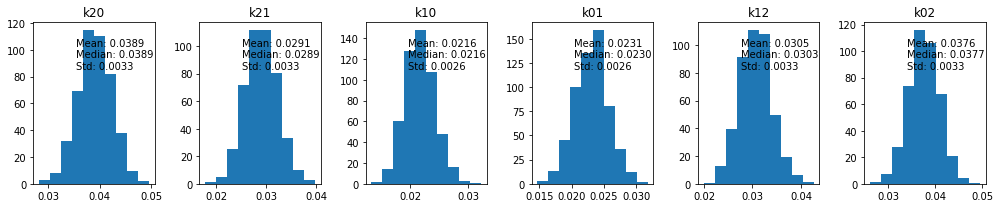

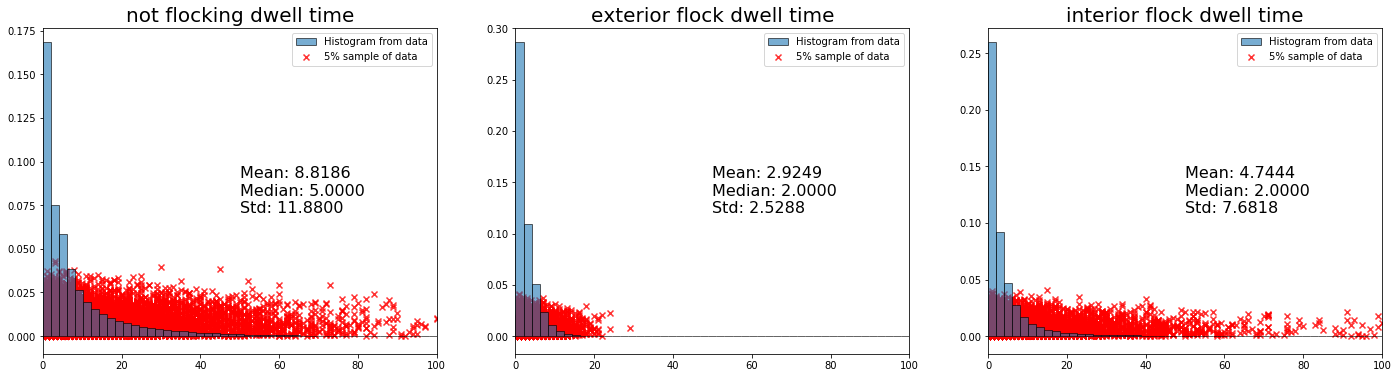

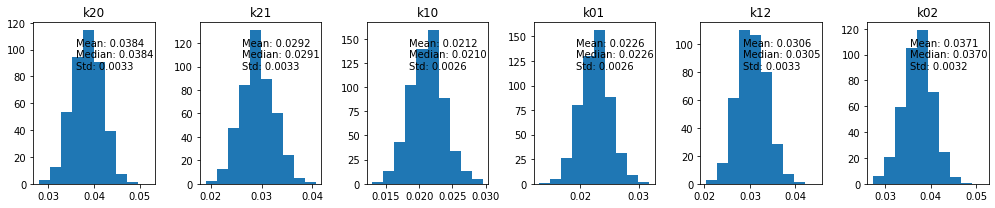

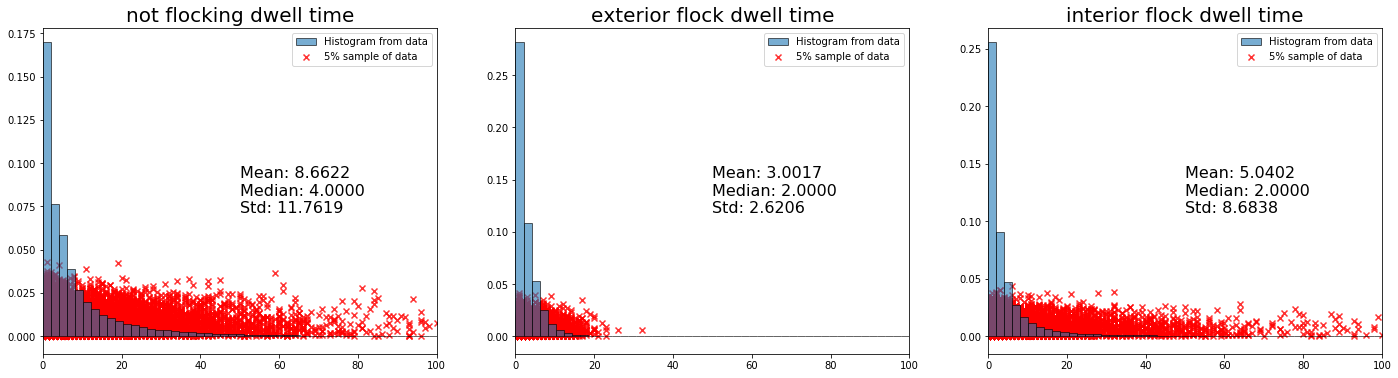

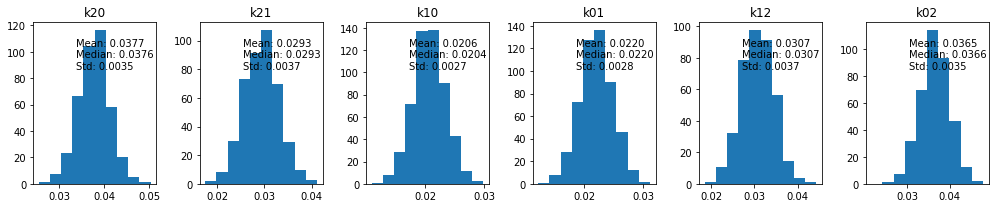

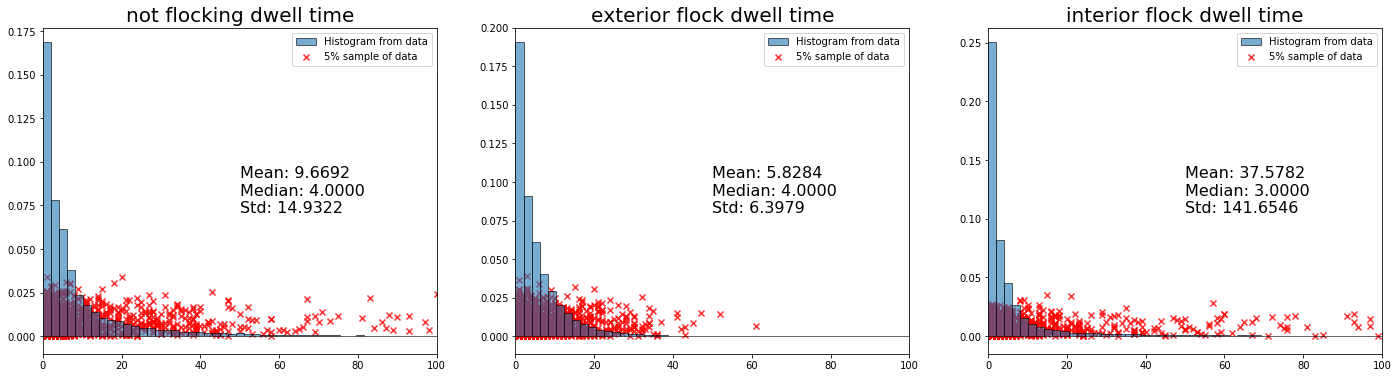

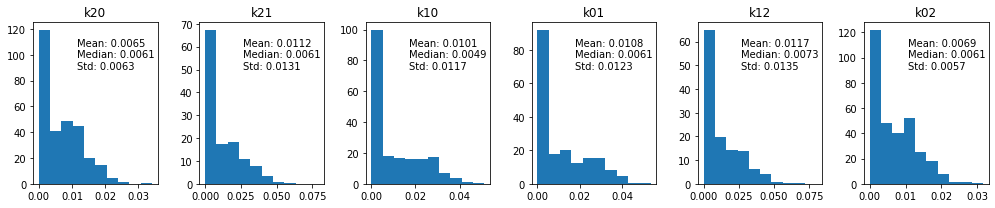

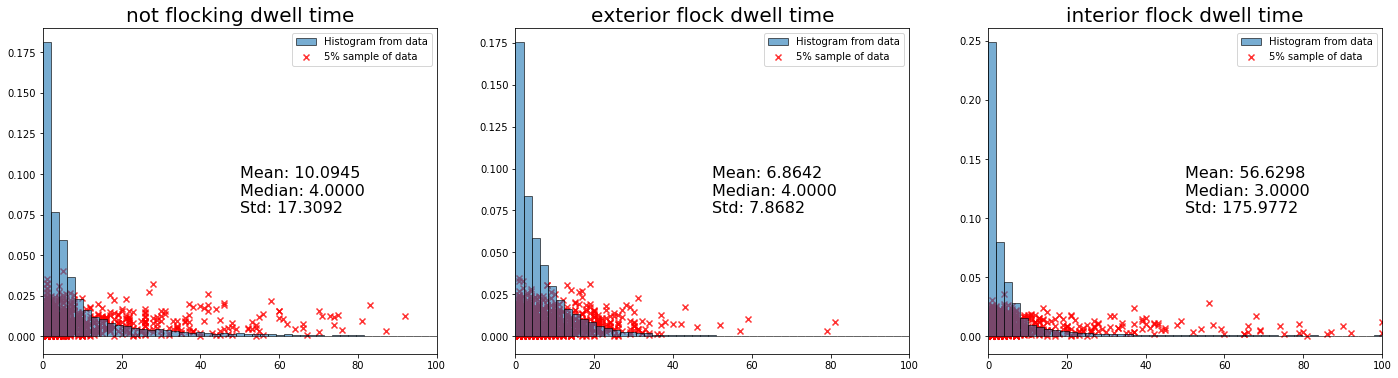

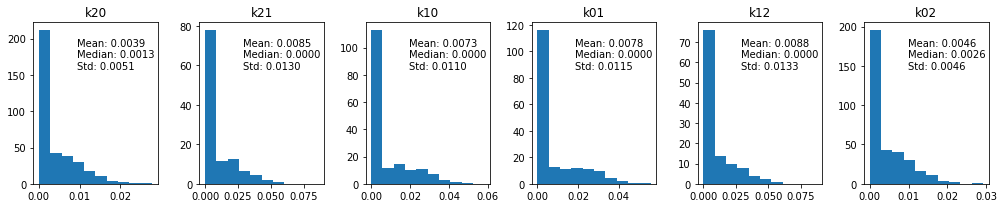

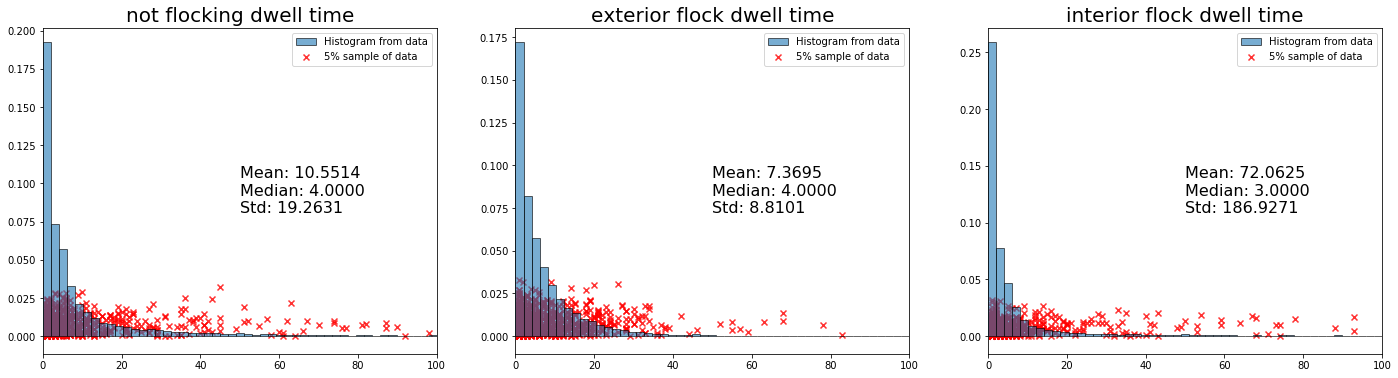

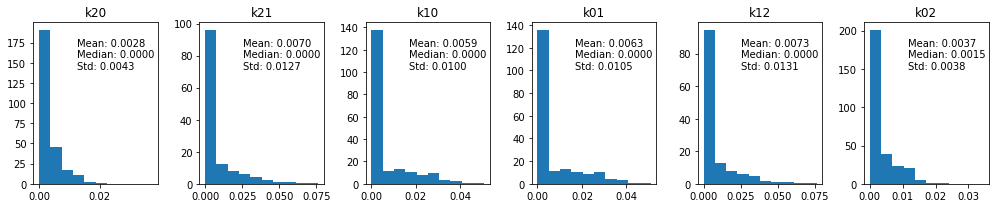

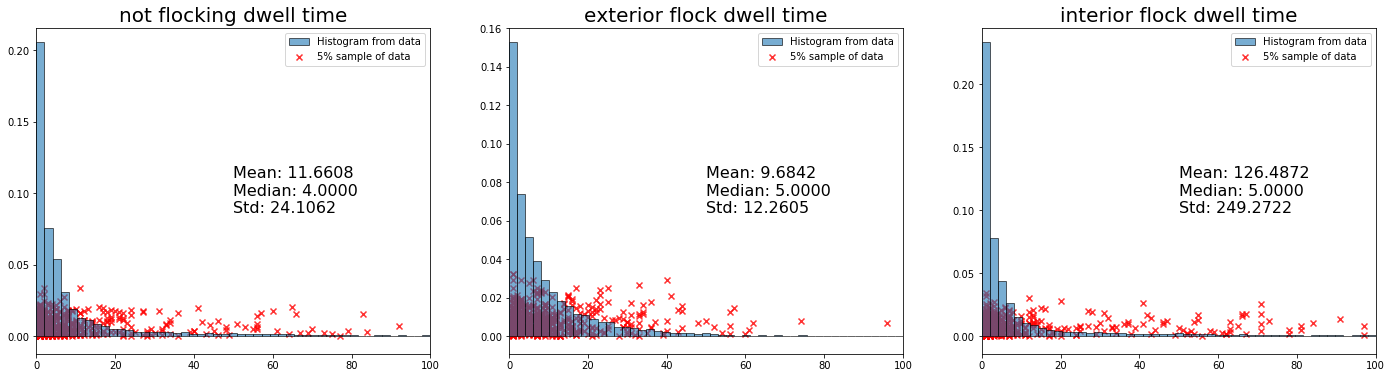

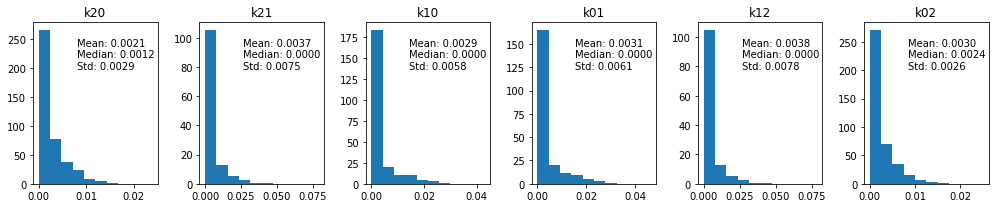

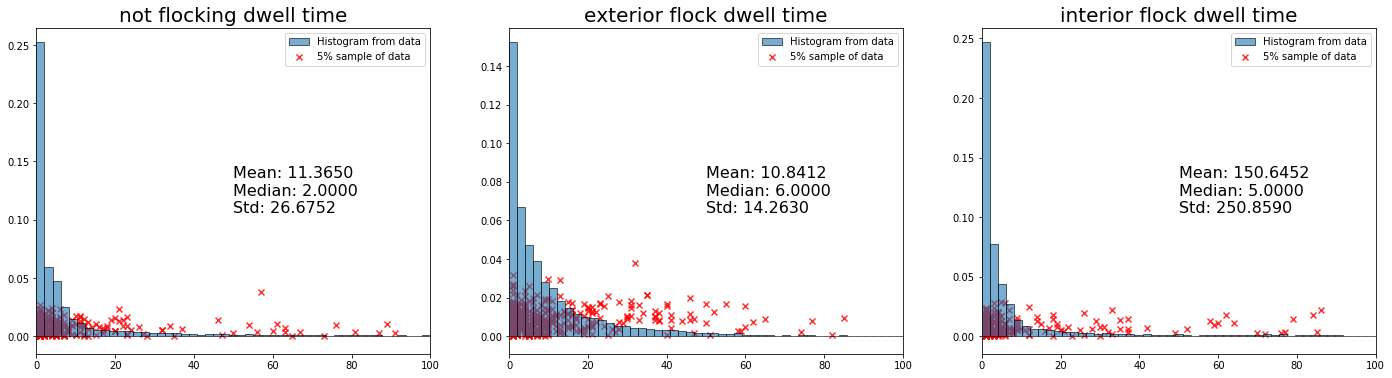

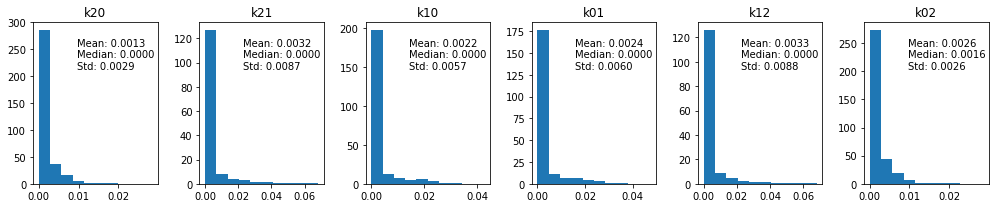

In [44]:
for i in range(64, 80):
    PlotFlockState('activeff_v0' + str(i) +'_r000_reload002_filament.flock')